In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23')

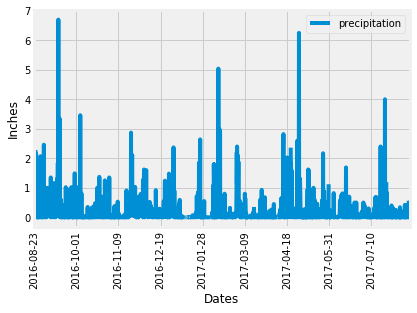

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
last_year = dt.date(2017,8,23) - dt.timedelta(365)

# Perform a query to retrieve the data and precipitation scores
rain_query = session.query(measurement.date, measurement.prcp).filter(measurement.date >= last_year).order_by(measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
rain_df = pd.DataFrame(rain_query)

# Sort the dataframe by date
rain_df.set_index("date", inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
rain_df.plot()
plt.xticks(rotation=90)
plt.xlabel("Dates")
plt.ylabel("Inches")
plt.legend(["precipitation"])
plt.show()


In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
rain_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [19]:
# Design a query to calculate the total number stations in the dataset
stations = session.query(station)
stations = session.query(station.station).all()    
stations_count = session.query(station.name).count()
stations_count

9

In [21]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
active = session.query(measurement.station, func.count(measurement.prcp)).group_by(measurement.station).order_by(func.count(measurement.prcp).desc()).all()
print(f"Most active station: {active[0][0]} with {active[0][1]} observations")

# List the stations and the counts in descending order.
for station, count in active:
    print(f"Station ID: {station}, Observations: {count}.")

Most active station: USC00519281 with 2772 observations
Station ID: USC00519281, Observations: 2772.
Station ID: USC00513117, Observations: 2696.
Station ID: USC00519397, Observations: 2685.
Station ID: USC00519523, Observations: 2572.
Station ID: USC00516128, Observations: 2484.
Station ID: USC00514830, Observations: 1937.
Station ID: USC00511918, Observations: 1932.
Station ID: USC00517948, Observations: 683.
Station ID: USC00518838, Observations: 342.


In [27]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_id = active[0][0]
lowest_temp = session.query(measurement.station, func.min(measurement.prcp)).filter(measurement.station == most_active_id).all()
print(f"Lowest temperature: {lowest_temp[0][1]}")
highest_temp = session.query(measurement.station, func.max(measurement.prcp)).filter(measurement.station == most_active_id).all()
print(f"Highest temperature: {highest_temp[0][1]}")
avg_temp = session.query(measurement.station, func.avg(measurement.prcp)).filter(measurement.station == most_active_id).all()
print(f"Average temperature: {avg_temp[0][1]}")

Lowest temperature: 0.0
Highest temperature: 9.64
Average temperature: 0.2123520923520915


In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [16]:
# Close Session
session.close()